In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics for performance evaluaiton
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("data.csv",header = 0)

In [ ]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explore data

In [ ]:
df.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


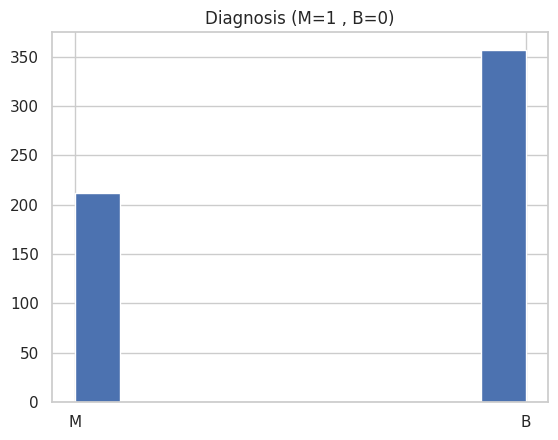

In [ ]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

B    357
M    212
Name: diagnosis, dtype: int64

Ratio of the Benign cases 62.74%
Ratio of the Malignant cases 37.26%


<Axes: xlabel='diagnosis', ylabel='count'>

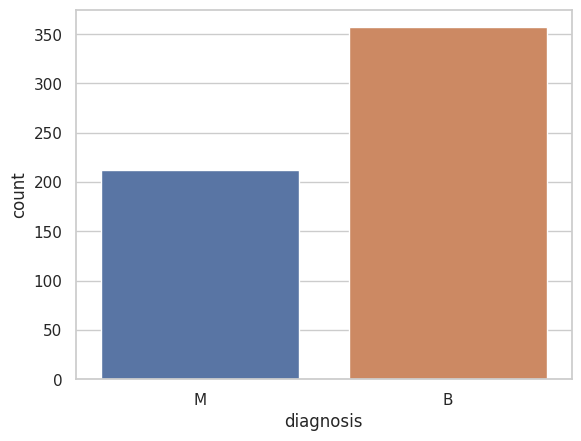

In [ ]:
print(df['diagnosis'].value_counts())

b = (df['diagnosis'].value_counts()[0] / len(df['diagnosis'])) * 100
m = (df['diagnosis'].value_counts()[1] / len(df['diagnosis'])) * 100

print('\nRatio of the Benign cases %.2f%%' % b)
print('Ratio of the Malignant cases %.2f%%' % m)

sb.countplot(x=df['diagnosis'])

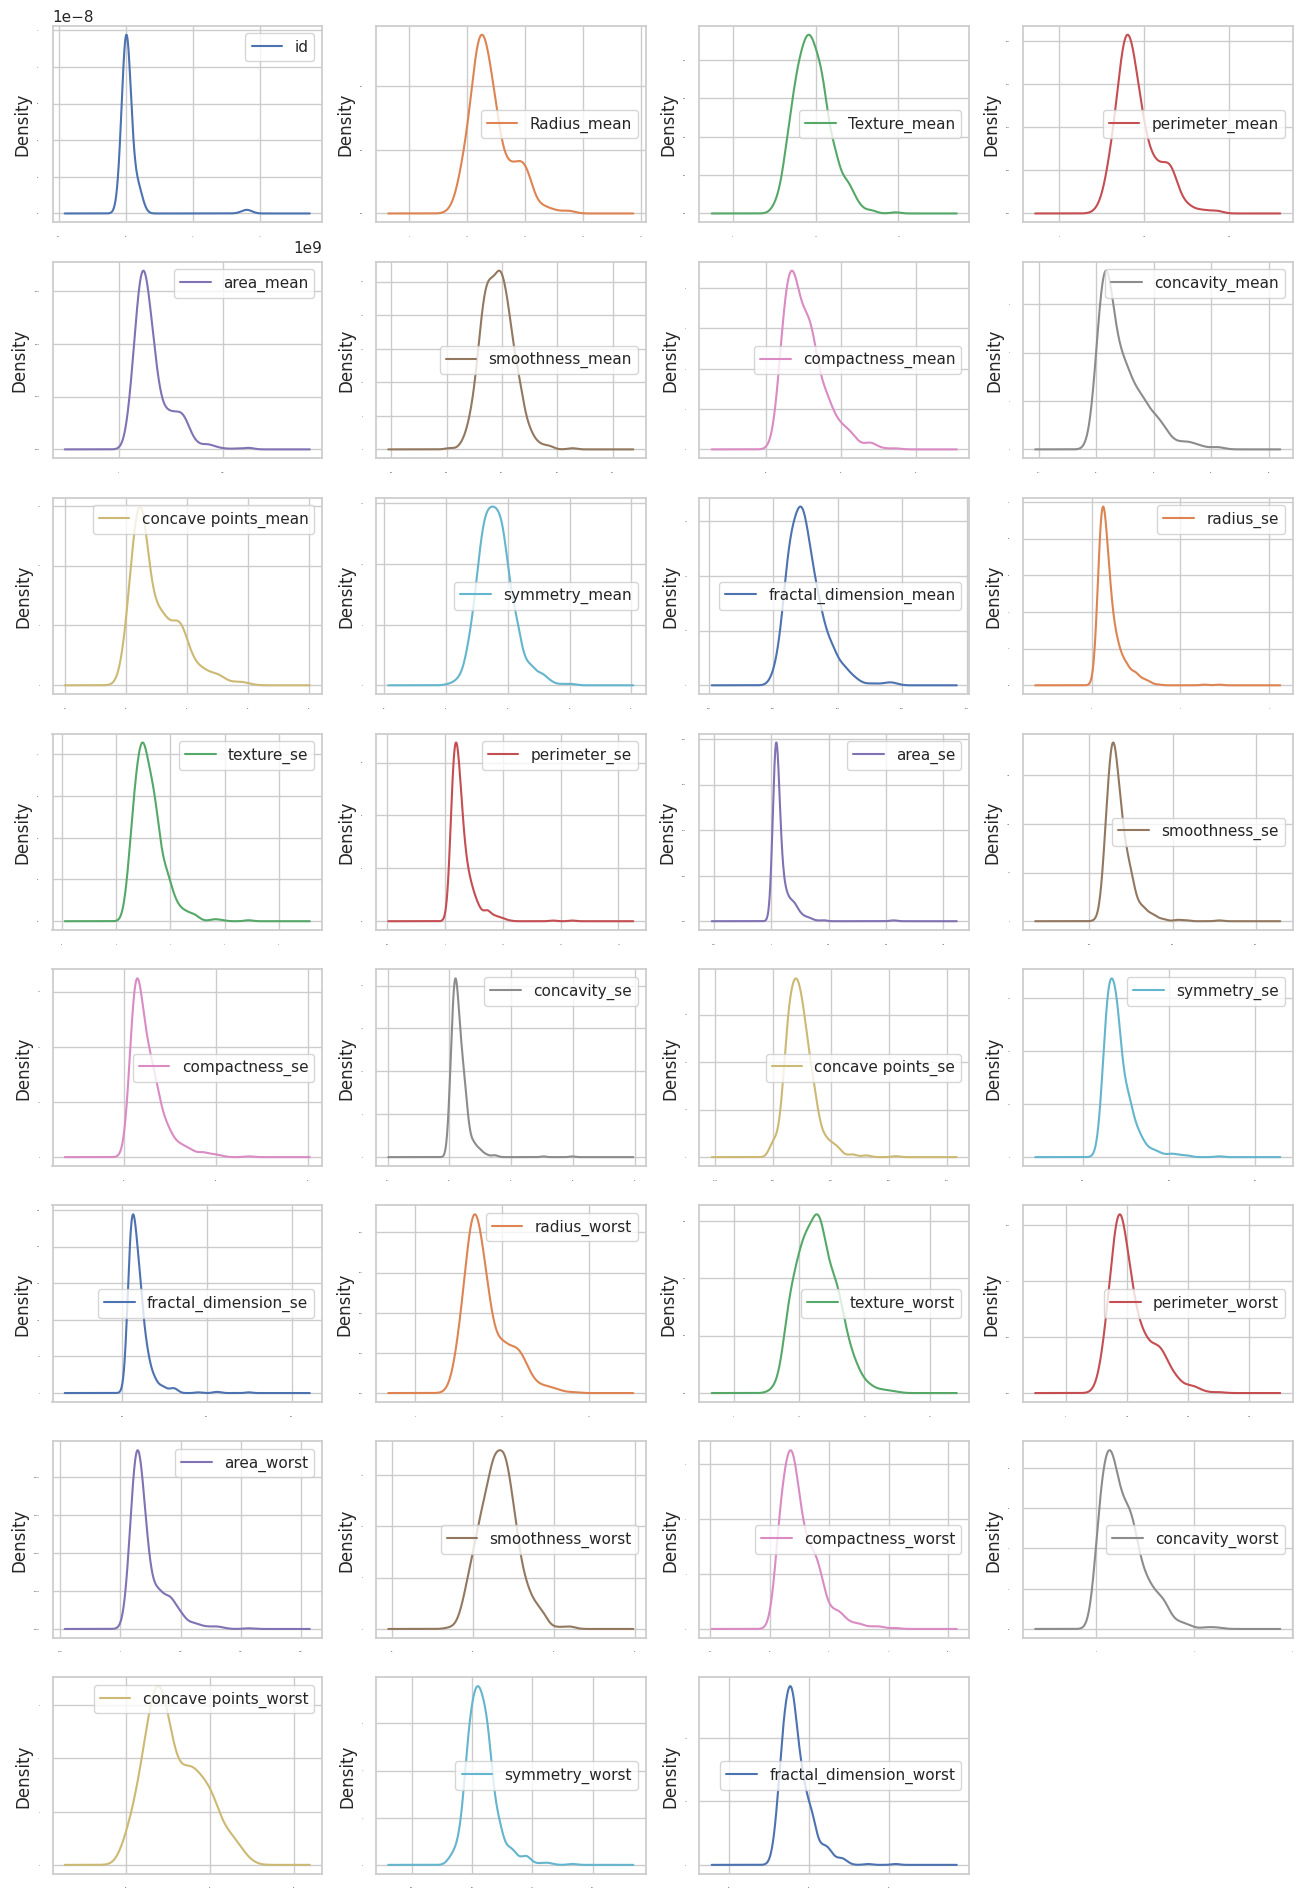

In [ ]:
# Let's check the distribution of the numerical feature
df.drop('diagnosis', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, fontsize=1, figsize=(16,24))
plt.show()

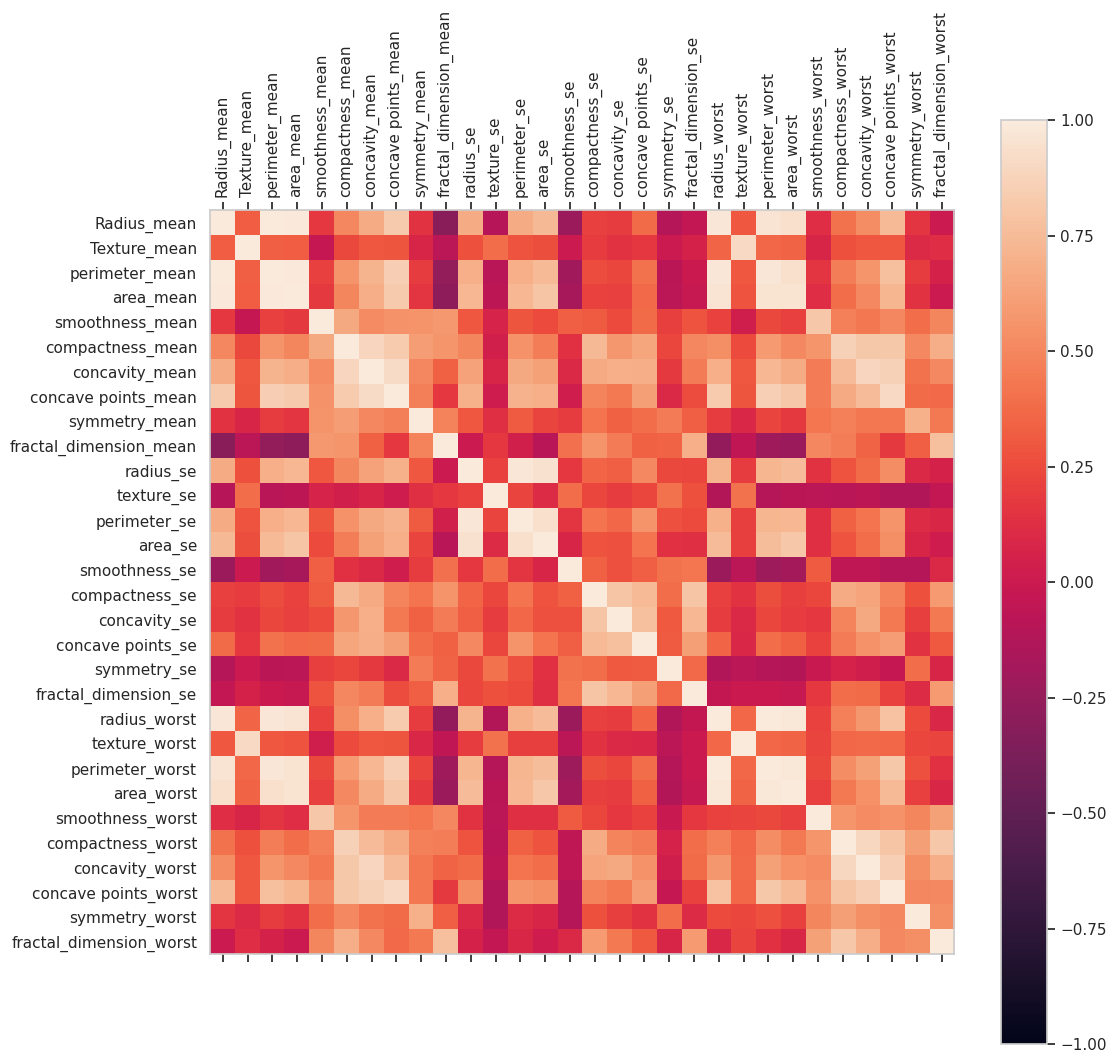

In [ ]:
# Correlation
df_corr = df.drop(['id', 'diagnosis'], axis=1)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df_corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90)
ax.set_yticklabels(df_corr.columns)
plt.show()

### Algorithm Evaluation

In [ ]:
# Constants for training and evaluation options
seed = 101
n_fold = 10
scr = 'accuracy'

# Create a function that evaluates different algorithms can be used for each update on the model
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('GN', GaussianNB()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVC', SVC()))

    names = []
    results = []

    for name, model in models:
        kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
        cv_result = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_result)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD(%.2f)' % (name, (cv_result.mean() * 100), cv_result.std())
        print(msg)

    # Plot results
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison', fontsize=16, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    plt.show()

### Prepare Data

In [ ]:
# Drop the id columns as it's not useful for the model
df = df.drop('id', axis=1)
df.shape

(569, 31)

In [ ]:
# Map the classes
dt_map = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(dt_map)
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### Drop Duplicates

In [ ]:
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('Number of dropped rows: %d' % (nr_rows - df.shape[0]))
print('Number of remainin rows: %d' % df.shape[0])

Number of rows: 569
Number of dropped rows: 0
Number of remainin rows: 569


### Train Test Split

In [ ]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

labeler = LabelEncoder()
y_cat = labeler.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=seed)

### Scaling Data

In [ ]:
scaler = MinMaxScaler()
fit = scaler.fit(x_train)
x_scaled = fit.transform(x_train)

LR - Mean ACC: 96.94% STD(0.03)
LDA - Mean ACC: 95.61% STD(0.03)
KNN - Mean ACC: 97.15% STD(0.02)
GN - Mean ACC: 94.29% STD(0.04)
CART - Mean ACC: 91.65% STD(0.03)
SVC - Mean ACC: 97.82% STD(0.02)


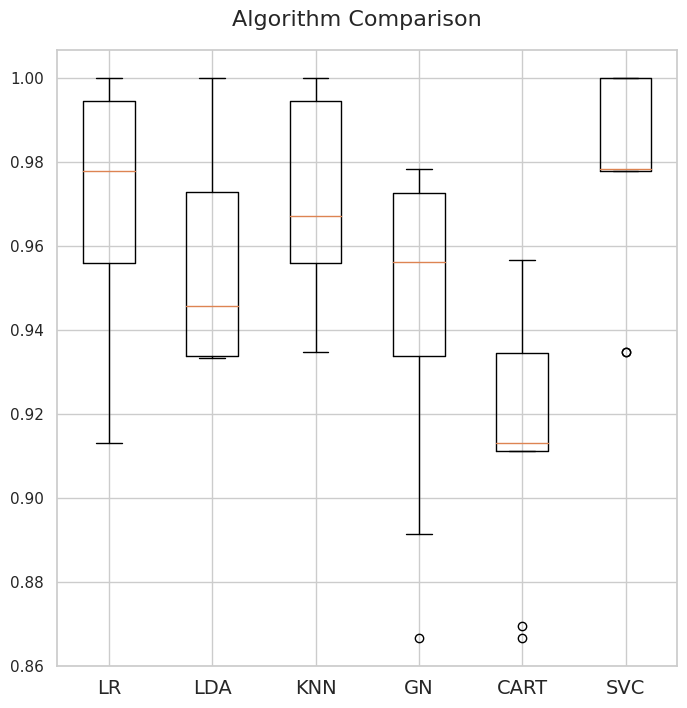

In [ ]:
evaluate_algorithms(x_scaled, y_train)

### Model

In [ ]:
# Hyper-parameter tuning
h_params = {'C': [0.1,1, 10, 100],
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_scaled, y_train)

print('Best accuracy score: %.2f%%' % (grid.best_score_*100))
print('Best parameters', grid.best_params_)

Best accuracy score: 98.02%
Best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Test Model

In [ ]:
# First we need train the model to test it
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(x_scaled, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
predictions = model.predict(fit.transform(x_test))
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

Accuracy score: 98.25%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



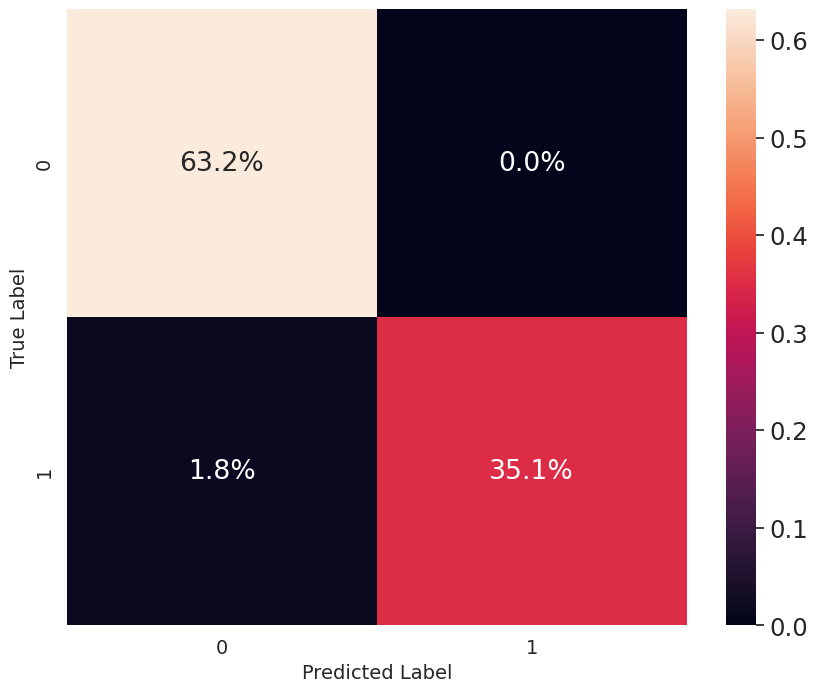

In [ ]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

conclusion - The purpose of this study wasy to create a model that can predict if a tumor is benign or malignant based on the given features. The SVC provided the best accuracy score with the given hyper-paramters. We also observed that scaling the data improved the performance of the algorithm for the sample dataset. As a next step, outliers can be removed to check if improves the performance or not.